In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Resizing,Rescaling,InputLayer,BatchNormalization

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imbikramsaha/food11

100% 519M/519M [00:05<00:00, 97.9MB/s]
100% 519M/519M [00:05<00:00, 93.1MB/s]


In [ ]:
! unzip "/content/food11.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/food11/train/hamburger/2722745.jpg  
  inflating: /content/dataset/food11/train/hamburger/272642.jpg  
  inflating: /content/dataset/food11/train/hamburger/2726558.jpg  
  inflating: /content/dataset/food11/train/hamburger/2738245.jpg  
  inflating: /content/dataset/food11/train/hamburger/2745577.jpg  
  inflating: /content/dataset/food11/train/hamburger/2745917.jpg  
  inflating: /content/dataset/food11/train/hamburger/2754513.jpg  
  inflating: /content/dataset/food11/train/hamburger/2756964.jpg  
  inflating: /content/dataset/food11/train/hamburger/2762170.jpg  
  inflating: /content/dataset/food11/train/hamburger/2766731.jpg  
  inflating: /content/dataset/food11/train/hamburger/2771605.jpg  
  inflating: /content/dataset/food11/train/hamburger/277584.jpg  
  inflating: /content/dataset/food11/train/hamburger/2777938.jpg  
  inflating: /content/dataset/food11/train/hamburger/2790429.jpg  
  inflating: 

In [ ]:
classes=["Apple pie","Cheesecake","Chicken Curry","French Fries","Fried Rice","Hamburger", "Hot Dog","Ice Cream","Omlett","Pizza","Sushi"]

In [ ]:
train=tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/food11/train",
    labels="inferred",label_mode='int'
    ,color_mode='rgb',
    image_size=(256,256),
    shuffle=True
)

Found 9900 files belonging to 11 classes.


In [ ]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

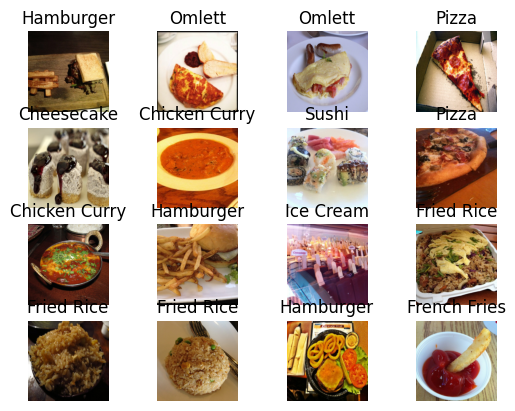

In [ ]:
for img,lab in train.take(3):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(img[i]/255)
    plt.title(classes[lab[i]])
    plt.axis("off")

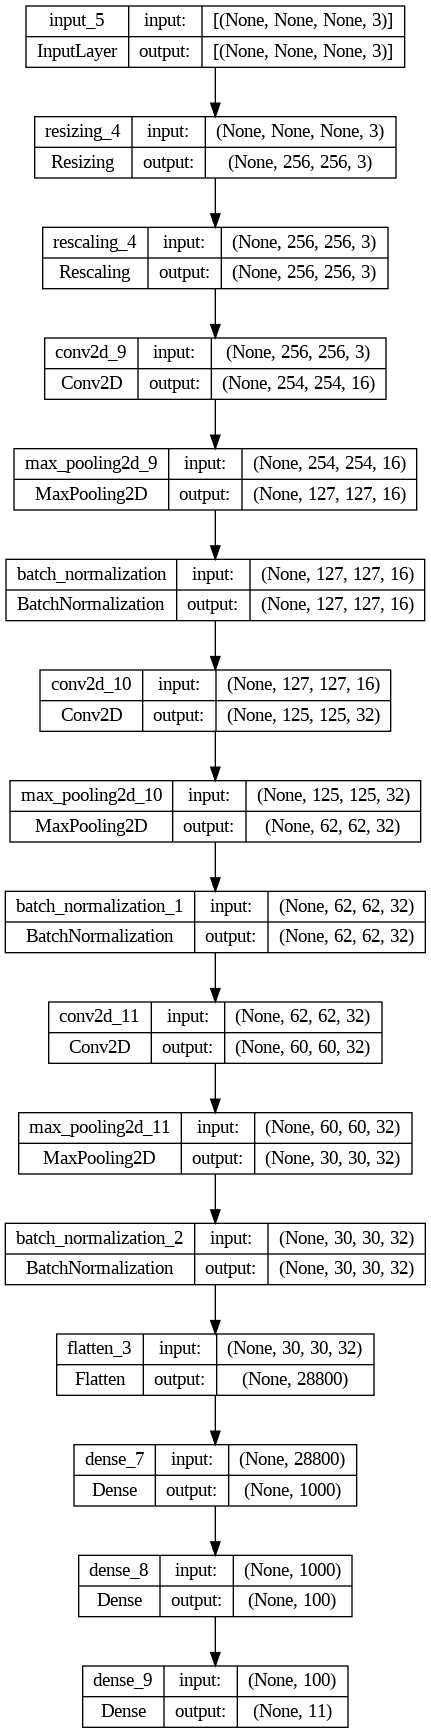

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(None,None,3)),

    Resizing(256,256),
    Rescaling(1/255),

    Conv2D(16,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),


    Flatten(),

    Dense(1000,activation="relu"),
    Dense(100,activation="relu"),
    Dense(11,activation="sigmoid")


    ])

tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# prompt: compile mu model with loss bce

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


In [ ]:
# prompt: compile my model with 5 different losses

model.compile(optimizer='adam',loss=['binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy', 'mean_squared_error', 'mean_absolute_error'],metrics=['accuracy'])


In [ ]:
model.fit(train,epochs=1)

310/310 [==============================] - 811s 3s/step - loss: 26.0004 - accuracy: 0.0909


In [ ]:
for img,lab in train.take(3):
  for i in range(1):
    myimg=(img[i]/255)


In [ ]:
a=model.predict((tf.expand_dims(myimg,axis=0)))

a


1/1 [==============================] - 0s 46ms/step


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

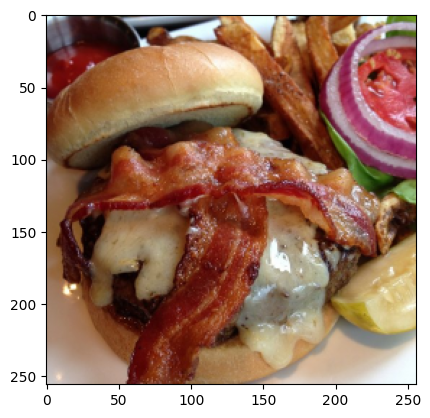

In [ ]:
plt.imshow(myimg)

In [ ]:
classes[np.argmax(a)]

'Apple pie'